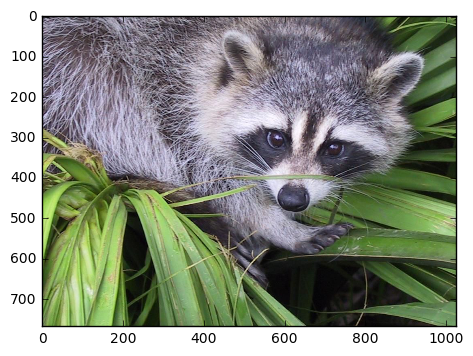

In [16]:
import numpy as np
from scipy import misc
f = misc.face()
misc.imsave('face.jpg', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()



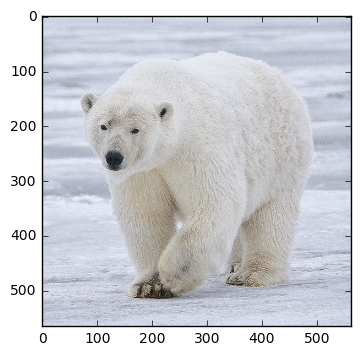

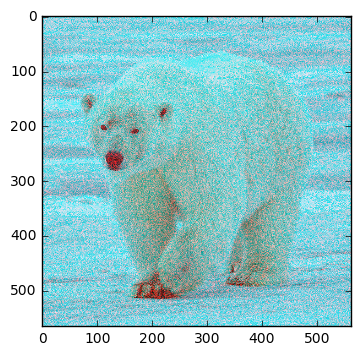

132.185931876 203.814511388 197.825684151
110.676041921 102.082419078 117.72977066


In [41]:
bear = misc.imread('bear.jpg')

plt.imshow(bear)
plt.show()

regressionToRGB(bear, 196.207670664, 204.814426508, 197.825684151, linear(0.1))

plt.imshow(bear)
plt.show()
print(np.mean(getRed(bear)), np.mean(getBlue(bear)), np.mean(getGreen(bear)))
print(np.mean(getRed(f)), np.mean(getBlue(f)), np.mean(getGreen(f)))

In [49]:
import os
def getImages(path):
    images = []
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            images.append(misc.imread(path + "/" + file))
    return images



In [ ]:
files = getImages('cj')


In [68]:
r,g,b = getRgbAvg(files)

KeyboardInterrupt: 

In [69]:
print(r, g, b)

146.702044725 140.042982232 136.880228891


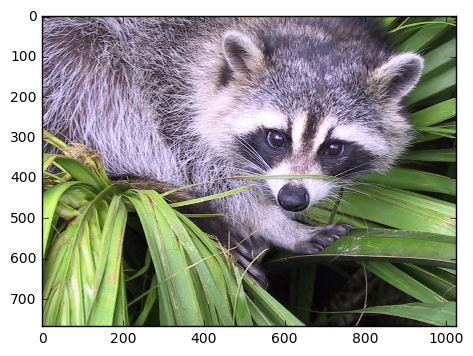

In [71]:
f = misc.face()
regressionToRGB(f, r, g, b, linear(0.5))
plt.imshow(f)
plt.show()

In [ ]:
test = misc.imread('test.jpg')
plt.imshow(test)

regressionToRGB

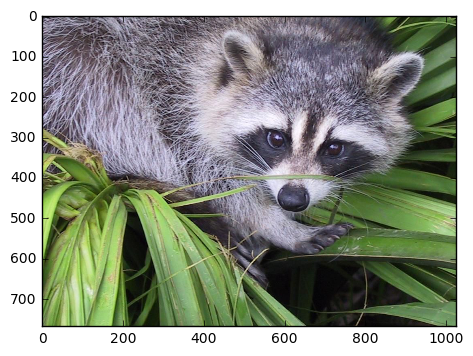

In [67]:
f = misc.face()
plt.imshow(f)
plt.show()

In [61]:
def getRgbAvg(images):
    r, g, b = [], [], []
    for image in images:
        r.append(np.mean(getRed(image)))
        g.append(np.mean(getGreen(image)))
        b.append(np.mean(getBlue(image)))
    return np.mean(r), np.mean(g), np.mean(b)
        

In [60]:
def getLum(img):
    lums = []
    for row in img:
        for col in row:
            lums.append(.3*col[0] + .59 * col[1] + .11 * col[2])
    return lums

def getRed(img):
    values = []
    for row in img:
        for col in row:
            values.append(col[0])
    return values

def getGreen(img):
    values = []
    for row in img:
        for col in row:
            values.append(col[1])
    return values

def getBlue(img):
    values = []
    for row in img:
        for col in row:
            values.append(col[2])
    return values

def drawLumHist(img):
    plt.hist(getLum(img), bins = 256, color = 'black')
    plt.show()

def drawRed(img):
    plt.hist(getRed(img), bins = 256, color = 'red', alpha = 0.5, lw = 0)
    plt.show()

def drawAll(img):
    plt.hist(getLum(img), bins = 256, color = 'black', alpha = 0.5, lw = 0)
    plt.hist(getRed(img), bins = 256, color = 'red', alpha = 0.3, lw = 0)
    plt.hist(getBlue(img), bins = 256, color = 'blue', alpha = 0.3, lw = 0)
    plt.hist(getGreen(img), bins = 256, color = 'green', alpha = 0.3, lw = 0)
    plt.show()
    
def dchangeExposure(img, percentage):
    for x in range(len(img)):
        for y in range (len(img[x])):
            dchangeUniform(img[x][y], percentage)
            
def dchangeRGB(img, R, G, B):
    dchangeRed(img,R)
    dchangeGreen(img,G)
    dchangeBlue(img,B)
    
def dchangeRed(img, percentage):
    for x in range(len(img)):
        for y in range (len(img[x])):
            temp = img[x][y][0] * (1.00 + percentage / 100)
            if temp >= 255:
                img[x][y][0] = 255
            else:
                img[x][y][0] = temp
            
def dchangeGreen(img, percentage):
    for x in range(len(img)):
        for y in range (len(img[x])):
            temp = img[x][y][1] * (1.00 + percentage / 100)
            if temp >= 255:
                img[x][y][1] = 255
            else:
                img[x][y][1] = temp

def dchangeBlue(img, percentage):
    for x in range(len(img)):
        for y in range (len(img[x])):
            temp = img[x][y][2] * (1.00 + percentage / 100)
            if temp >= 255:
                img[x][y][2] = 255
            else:
                img[x][y][2] = temp
            
            
def dchangeUniform(pix, percentage):
    for i in range(3):
        temp = pix[i] * (1.00 + percentage / 100)
        if temp >= 255:
            pix[i] = 255
        else:
            pix[i] = temp
            
def higherExposure(img, percentage):
    newImg = []
    for row in img:
        newRow = []
        for col in row:
            newRow.append(changeUniform(col, percentage))
        newImg.append(np.array(newRow))
    return np.array(newImg)
            
def changeUniform(pix, percentage):
    newPix = []
    for i in range(3):
        temp = pix[i] * (1.00 + percentage / 100)
        if temp >= 255:
            newPix.append(0)
        else:
            newPix.append(255 - int(temp))
    return np.array(newPix, dtype = 'int8')

In [33]:
def nthRoot(n):
    def returnPercentage(original, target):
        if original < target:
            return (original / target) ** (1 / n) * 100
        else:
            return (original - target)
        
def linear(a):
    return lambda original, target : (target - original) / target * a * 100

def regressionToRGB(img, r, g, b, f):
    r_mean = np.mean(getRed(img))
    g_mean = np.mean(getGreen(img))
    b_mean = np.mean(getBlue(img))
    squareRoot = nthRoot(2)
    dchangeRGB(img, f(r_mean, r), f(g_mean, g), f(b_mean, b))